In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict, OrderedDict
import math
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [7]:
train_users_path = '../../Data/train_users_2.csv'
train_users = pd.read_csv(train_users_path)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Compare age vs Destination

In [26]:
#see if young people are more likely to travel out of US
valid = np.logical_and(train_users['age'] > 10, train_users['age'] < 80)
valid_users = train_users.ix[valid,:]
print valid_users[['age','country_destination']].dropna().groupby('country_destination')['age'].describe()

country_destination       
AU                   count      428.000000
                     mean        37.172897
                     std         10.896705
                     min         18.000000
                     25%         29.000000
                     50%         35.000000
                     75%         43.000000
                     max         73.000000
CA                   count     1054.000000
                     mean        36.918406
                     std         11.044285
                     min         18.000000
                     25%         29.000000
                     50%         34.000000
                     75%         43.000000
                     max         74.000000
DE                   count      833.000000
                     mean        36.529412
                     std         11.853246
                     min         18.000000
                     25%         28.000000
                     50%         33.000000
                     75%   

In [9]:
destinations = list(train_users['country_destination'].drop_duplicates())
dest_map = dict(zip(destinations,range(len(destinations))))
valid_users['dest_map'] = valid_users['country_destination'].apply(lambda x: dest_map[x])

/home/ninad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
def plot_countryage(country):
    dest = valid_users[valid_users['country_destination'] == country]
    sns.distplot(dest['age'])
    sns.plt.title(country)
    sns.plt.show()

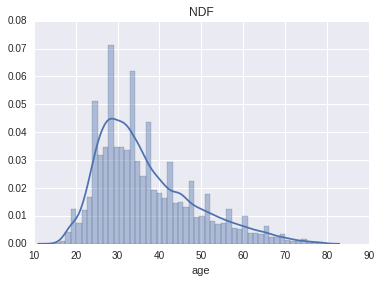

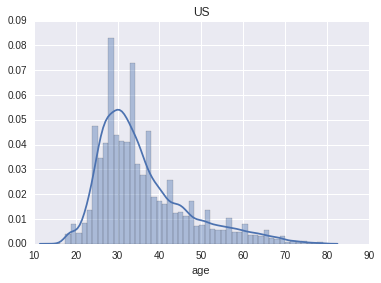

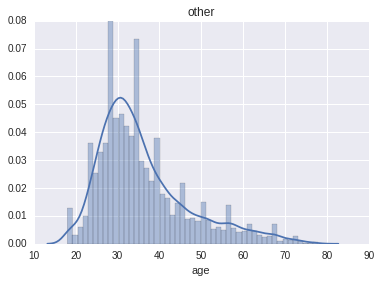

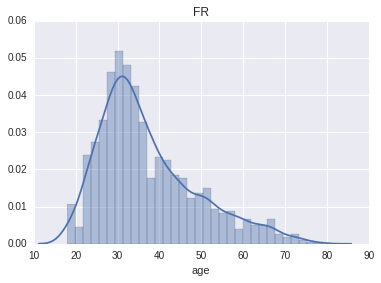

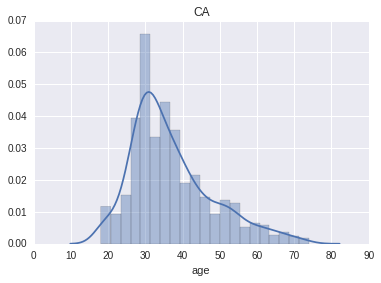

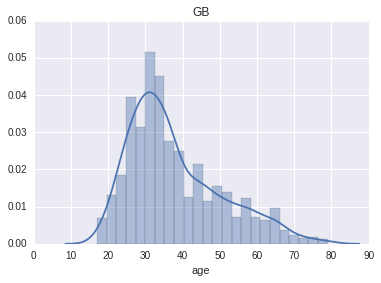

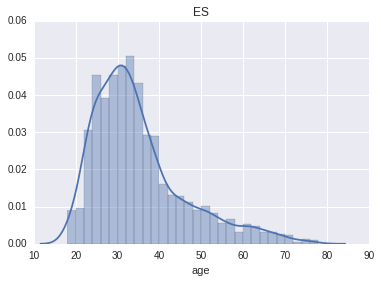

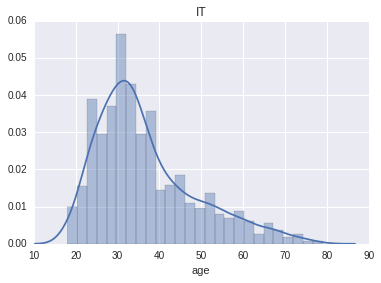

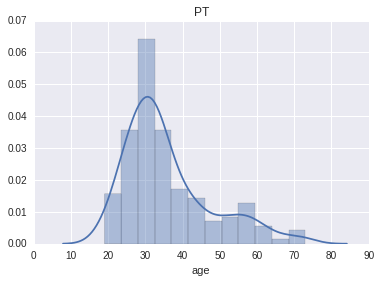

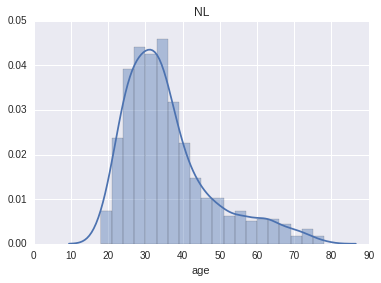

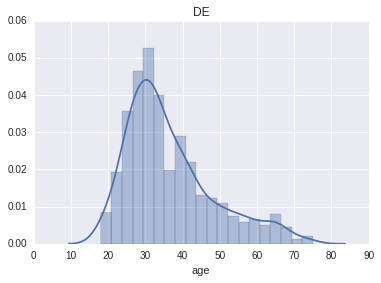

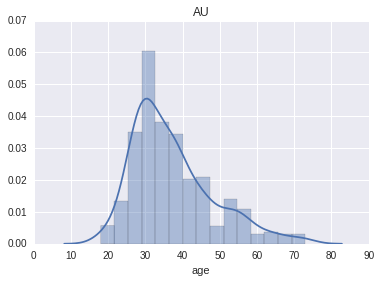

In [11]:
#age distribution per destination
for d in destinations:
    plot_countryage(d)

## Compare $\Delta$ date_account_created and date_first_booking to dest

In [12]:
#valid = train_users['']
# no nan date acc created
print train_users['date_account_created'].shape
print train_users['date_account_created'].dropna().shape

# no nan timestamp first active
print train_users['timestamp_first_active'].shape
print train_users['timestamp_first_active'].dropna().shape

#non bookings
print train_users['date_first_booking'].shape
print train_users['date_first_booking'].dropna().shape

(213451,)
(213451,)
(213451,)
(213451,)
(213451,)
(88908,)


In [13]:
#remove non bookers (NDF)
valid = train_users['date_first_booking'].apply(pd.isnull)
valid = ~valid
valid_users = train_users.ix[valid,:]

In [14]:
valid_users['tfa-dac'] = valid_users.\
    apply(lambda x: (datetime.datetime.strptime(x['date_account_created'], '%Y-%m-%d') \
                     - datetime.datetime.strptime(str(x['timestamp_first_active'])[:-6], '%Y%m%d')).total_seconds()\
          /(60*60*24.0) \
          ,axis=1)
    
#valid_users['tfa-dfb'] = valid_users.\
#    apply(lambda x: (datetime.datetime.strptime(x['date_first_booking'], '%Y-%m-%d') \
#                     - datetime.datetime.strptime(str(x['timestamp_first_active'])[:-6], '%Y%m%d')).total_seconds() \
#         ,axis=1)

/home/ninad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
valid_users.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa-dac,tfa-dfb
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,476.0,36201600.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,765.0,90115200.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,280.0,6220800.0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,0.0,86400.0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,0.0,259200.0
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,0.0,864000.0
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,0.0,17798400.0
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,0.0,0.0
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,0.0,172800.0
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR,0.0,1123200.0


In [119]:
def plot_tfadac_country(country):
    dest = valid_users[valid_users['country_destination'] == country]
    sns.distplot(dest['tfa-dac'])
    sns.plt.title(country)
    sns.plt.show()

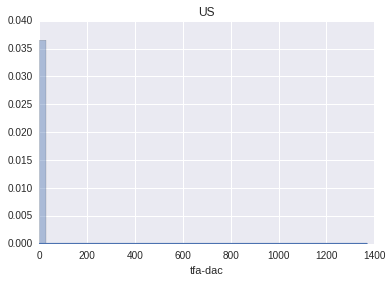

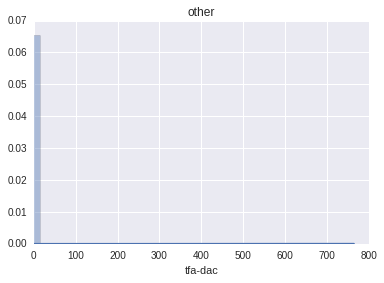

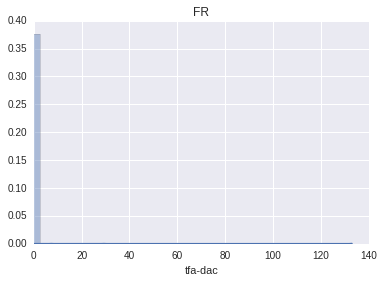

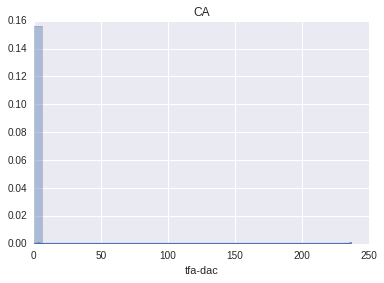

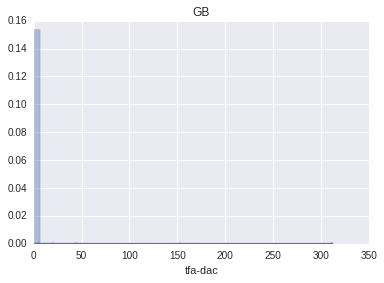

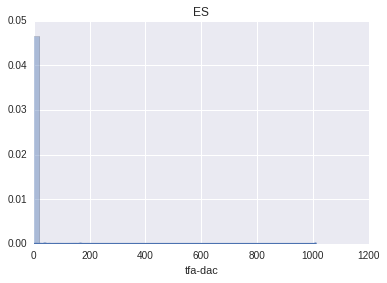

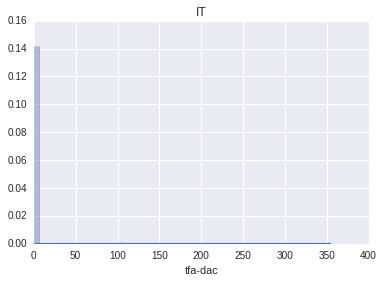

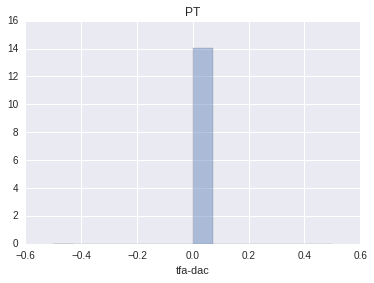

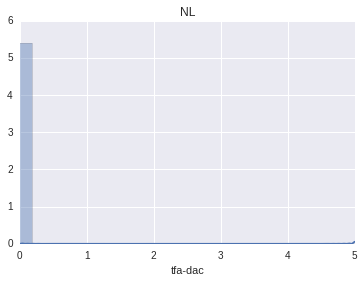

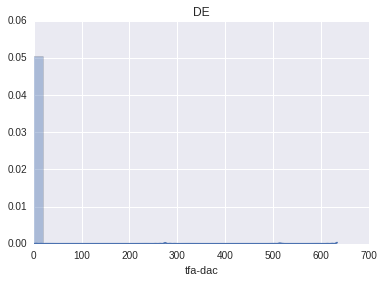

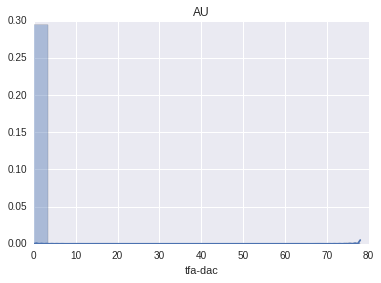

In [129]:
#dest = valid_users[valid_users['country_destination'] == 'US']
dest_bought = destinations[1:]
for d in dest_bought:
    plot_tfadac_country(d)

# Sessions

In [ ]:
sessions = pd.read_csv('../../Data/sessions.csv')

In [22]:
sessions[sessions['user_id'] == 'd1mm9tcy42']

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [18]:
actions = list(sessions['action_detail'].drop_duplicates())

In [20]:
sessions['action_type'].drop_duplicates()

0                       NaN
1                     click
7                      data
8                      view
44                   submit
45             message_post
78                -unknown-
139         booking_request
2392       partner_callback
284946     booking_response
6667669              modify
Name: action_type, dtype: object

In [19]:
actions

[nan,
 'view_search_results',
 'wishlist_content_update',
 'similar_listings',
 'change_trip_characteristics',
 'p3',
 'header_userpic',
 'contact_host',
 'message_post',
 '-unknown-',
 'dashboard',
 'create_user',
 'confirm_email_link',
 'user_profile_content_update',
 'user_profile',
 'pending',
 'p5',
 'create_phone_numbers',
 'cancellation_policies',
 'user_wishlists',
 'change_contact_host_dates',
 'wishlist',
 'message_thread',
 'request_new_confirm_email',
 'send_message',
 'your_trips',
 'login_page',
 'login',
 'login_modal',
 'toggle_archived_thread',
 'p1',
 'profile_verifications',
 'edit_profile',
 'oauth_login',
 'post_checkout_action',
 'account_notification_settings',
 'update_user_profile',
 'oauth_response',
 'signup_modal',
 'signup_login_page',
 'at_checkpoint',
 'manage_listing',
 'create_listing',
 'your_listings',
 'profile_references',
 'list_your_space',
 'popular_wishlists',
 'listing_reviews_page',
 'apply_coupon',
 'user_tax_forms',
 'account_payout_preferen

# Countries

In [23]:
countries = pd.read_csv('../../Data/countries.csv')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [25]:
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


# Only Training users in Sessions

In [29]:
train_in_sessions = train_users[train_users['id'].drop_duplicates().isin(sessions['user_id'].drop_duplicates())]

In [30]:
train_in_sessions

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
137021,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
137022,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
137023,4grx6yxeby,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
137024,ncf87guaf0,2014-01-01,20140101002146,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
137025,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB
137026,c8mfesvkv0,2014-01-01,20140101002626,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF
137027,xwxei6hdk4,2014-01-01,20140101002742,2014-01-07,FEMALE,32.0,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US
137028,5f45ro5uzk,2014-01-01,20140101003535,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF
137029,ro2stddszp,2014-01-01,20140101005503,2014-12-04,-unknown-,19.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other
137031,qtw88d9pbl,2014-01-01,20140101005837,NaN,MALE,25.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
